In [4]:
from sqlalchemy import create_engine
# MySQL connection
username = "root"
password = "123456"
host = "localhost"
port = "3306"
database = "banking_data"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "customer"   # choose any table name

 #--- Reading Data from MySQL Table ---
query = "SELECT * FROM customer;"
df = pd.read_sql(query, con=engine)
# Display first few rows
print(df.head())

  ï»¿Client ID             Name  Age  Location ID Joined Bank  \
0     IND81288    Raymond Mills   24        34324  06-05-2019   
1     IND65833    Julia Spencer   23        42205  10-12-2001   
2     IND47499   Stephen Murray   27         7314  25-01-2010   
3     IND72498   Virginia Garza   40        34594  28-03-2019   
4     IND60181  Melissa Sanders   46        41269  20-07-2012   

    Banking Contact Nationality            Occupation Fee Structure  \
0    Anthony Torres    American  Safety Technician IV          High   
1  Jonathan Hawkins     African   Software Consultant          High   
2     Anthony Berry    European    Help Desk Operator          High   
3        Steve Diaz    American          Geologist II           Mid   
4        Shawn Long    American   Assistant Professor           Mid   

  Loyalty Classification  ...  Bank Deposits  Checking Accounts  \
0                   Jade  ...     1485828.64          603617.88   
1                   Jade  ...      641482.79    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df.shape

(3000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [8]:
#Generate descriptive statistics from the dataFrame
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
df['Estimated Income'].min() #numerical data 

15919.48

In [10]:
#convert  numerical data into categorical data
bins = [0,100000, 300000, float('inf')]
labels = ['Low','Med', 'High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins = bins, labels = labels,right = False)

<Axes: xlabel='Income Band'>

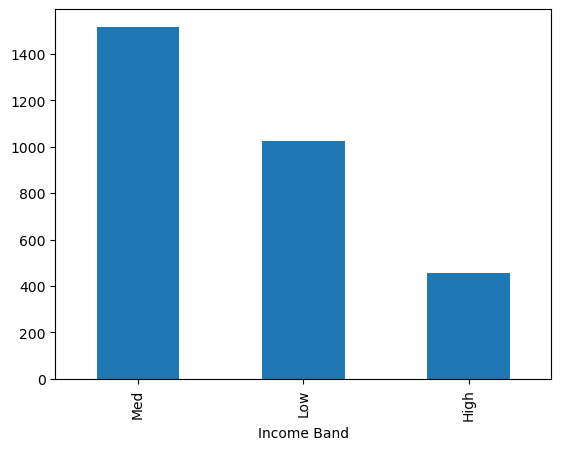

In [11]:
df['Income Band'].value_counts().plot(kind = "bar")

In [39]:
desired_cols = ["BRID", "GenderId", "IAID", "Amount of credit card", "Nationality", "Occupation",
                "Free Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]

categorical_cols = [col for col in desired_cols if col in df.columns]

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())


Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64